In [1]:

import json
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
from sklearn.utils import shuffle
from tensorflow.keras.layers import GRU, Input, Dropout, Dense
from tensorflow.keras.models import Model

import joblib
from google.colab import drive
from tensorflow.keras.layers import GRU

# Mount Google Drive for access
drive.mount('/content/drive')

# Load and process the data
def load_data(file_path):
    with open(file_path, 'r') as file:
        return np.array(json.load(file))


# Upsample the centroid data to match the size of the MFCC data (same as before)
# Rest of the code remains the same...

# Concatenate the upsampled Centroid and MFCC data (same as before)
# Rest of the code remains the same...

# Normalize MFCC and centroid data and reshape (same as before)
# Rest of the code remains the same...

# Shuffle the training and validation data indices (same as before)
# Rest of the code remains the same...

# Save the label encoder for later use (same as before)
# Rest of the code remains the same...

# Build RNN model topology with GRU units for combined data (same as before)
# Rest of the code remains the same...

# Create the Adam optimizer with your desired learning rate (same as before)
# Rest of the code remains the same...

# Compile model (same as before)
# Rest of the code remains the same...

# Summary of the model (same as before)
# Rest of the code remains the same...

# Train the model (same as before)
# Rest of the code remains the same...










Mounted at /content/drive


In [2]:
X_train_centroid = load_data('/content/drive/MyDrive/My-207/X_train_centroid.json')
X_val_centroid = load_data('/content/drive/MyDrive/My-207/X_val_centroid.json')
X_train_mfcc = load_data('/content/drive/MyDrive/My-207/X_train_mfcc.json')
X_val_mfcc = load_data('/content/drive/MyDrive/My-207/X_val_mfcc.json')
y_train = np.array(json.load(open('/content/drive/MyDrive/My-207/y_train_centroid.json', 'r')))
y_val = np.array(json.load(open('/content/drive/MyDrive/My-207/y_val_centroid.json', 'r')))

In [3]:
# Swap the x and y axis for convolution on the time dimension for MFCC data
train_X_mfcc_perm = [np.transpose(each) for each in X_train_mfcc]
X_train_mfcc = np.array(train_X_mfcc_perm)

val_X_mfcc_perm = [np.transpose(each) for each in X_val_mfcc]
X_val_mfcc = np.array(val_X_mfcc_perm)

# Swap the x and y axis for convolution on the time dimension for centroid data
train_X_centroid_perm = [np.transpose(each) for each in X_train_centroid]
X_train_centroid = np.array(train_X_centroid_perm)

val_X_centroid_perm = [np.transpose(each) for each in X_val_centroid]
X_val_centroid = np.array(val_X_centroid_perm)

# Convert string labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)



In [4]:
#  Upsample the centroid data to match the size of the MFCC data
random_indices = np.random.choice(range(X_train_centroid.shape[0]), size=X_train_mfcc.shape[0], replace=True)
X_train_centroid_upsampled = X_train_centroid[random_indices]
y_train_encoded_upsampled = y_train_encoded[random_indices]

random_indices = np.random.choice(range(X_val_centroid.shape[0]), size=X_val_mfcc.shape[0], replace=True)
X_val_centroid_upsampled = X_val_centroid[random_indices]
y_val_encoded_upsampled = y_val_encoded[random_indices]

# Pad the Centroid data to match the time steps of the MFCC data (same as before)
max_time_steps = max(X_train_mfcc.shape[1], X_val_mfcc.shape[1])
X_train_centroid_padded = pad_sequences(X_train_centroid_upsampled, maxlen=max_time_steps, dtype='float32', padding='post', truncating='post')
X_val_centroid_padded = pad_sequences(X_val_centroid_upsampled, maxlen=max_time_steps, dtype='float32', padding='post', truncating='post')

# Add a new axis to the padded Centroid data
X_train_centroid_expanded = X_train_centroid_padded[..., np.newaxis]
X_val_centroid_expanded = X_val_centroid_padded[..., np.newaxis]

# Ensure both datasets have the same number of samples
min_samples_train = min(X_train_mfcc.shape[0], X_train_centroid_expanded.shape[0])
X_train_mfcc = X_train_mfcc[:min_samples_train]
X_train_centroid_expanded = X_train_centroid_expanded[:min_samples_train]
y_train_encoded = y_train_encoded[:min_samples_train]

min_samples_val = min(X_val_mfcc.shape[0], X_val_centroid_expanded.shape[0])
X_val_mfcc = X_val_mfcc[:min_samples_val]
X_val_centroid_expanded = X_val_centroid_expanded[:min_samples_val]
y_val_encoded = y_val_encoded[:min_samples_val]

# Concatenate the upsampled Centroid and MFCC data
X_train_combined = np.concatenate((X_train_centroid_expanded, X_train_mfcc), axis=-1)
X_val_combined = np.concatenate((X_val_centroid_expanded, X_val_mfcc), axis=-1)

# Normalize MFCC and centroid data and reshape (same as before)
train_X_reshape = X_train_combined.reshape(-1, X_train_combined.shape[1]*X_train_combined.shape[2])
val_X_reshape = X_val_combined.reshape(-1, X_train_combined.shape[1]*X_train_combined.shape[2])

scaler = MinMaxScaler((0,1)).fit(train_X_reshape)
train_X_scaled = scaler.transform(train_X_reshape)
val_X_scaled = scaler.transform(val_X_reshape)

X_train_combined = train_X_scaled.reshape(-1, X_train_combined.shape[1], X_train_combined.shape[2])
X_val_combined = val_X_scaled.reshape(-1, X_train_combined.shape[1], X_train_combined.shape[2])


# Shuffle the training and validation data indices
train_indices = np.random.permutation(X_train_combined.shape[0])
val_indices = np.random.permutation(X_val_combined.shape[0])

X_train_combined = X_train_combined[train_indices]
y_train_encoded = y_train_encoded_upsampled[train_indices]

X_val_combined = X_val_combined[val_indices]
y_val_encoded = y_val_encoded_upsampled[val_indices]

# Save the label encoder for later use (same as before)
joblib.dump(label_encoder, "label_encoder.pkl")


['label_encoder.pkl']

In [5]:

# Build RNN model topology with GRU units for combined data
model = tf.keras.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True, activation='tanh', input_shape=(X_train_combined.shape[1], X_train_combined.shape[2])),
    tf.keras.layers.GRU(64, return_sequences=True, activation='tanh'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Create the Adam optimizer with your desired learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.002)

# Compile model
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 157, 32)           5280      
                                                                 
 gru_1 (GRU)                 (None, 157, 64)           18816     
                                                                 
 flatten (Flatten)           (None, 10048)             0         
                                                                 
 dense (Dense)               (None, 1024)              10290176  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0

In [6]:
# Train the model
history = model.fit(X_train_combined, y_train_encoded,
                    validation_data=(X_val_combined, y_val_encoded),
                    batch_size=32, epochs=100)

Epoch 1/100
247/247 [==============================] - 123s 476ms/step - loss: 1.2264 - accuracy: 0.3814 - val_loss: 1.1370 - val_accuracy: 0.3547
Epoch 2/100
247/247 [==============================] - 115s 464ms/step - loss: 1.0954 - accuracy: 0.4004 - val_loss: 1.1297 - val_accuracy: 0.2483
Epoch 3/100
247/247 [==============================] - 116s 472ms/step - loss: 1.0881 - accuracy: 0.4085 - val_loss: 1.1189 - val_accuracy: 0.2589
Epoch 4/100
247/247 [==============================] - 115s 464ms/step - loss: 1.0888 - accuracy: 0.4132 - val_loss: 1.1280 - val_accuracy: 0.2509
Epoch 5/100
247/247 [==============================] - 119s 480ms/step - loss: 1.0869 - accuracy: 0.4068 - val_loss: 1.1260 - val_accuracy: 0.3412
Epoch 6/100
247/247 [==============================] - 114s 460ms/step - loss: 1.0805 - accuracy: 0.4182 - val_loss: 1.1383 - val_accuracy: 0.2406
Epoch 7/100
247/247 [==============================] - 120s 487ms/step - loss: 1.0792 - accuracy: 0.4191 - val_loss: 1

In [7]:
model.save('/content/drive/MyDrive/207/207-Project/notebooks/AA/GRU_RNN_MFCC_Centroid.h5')

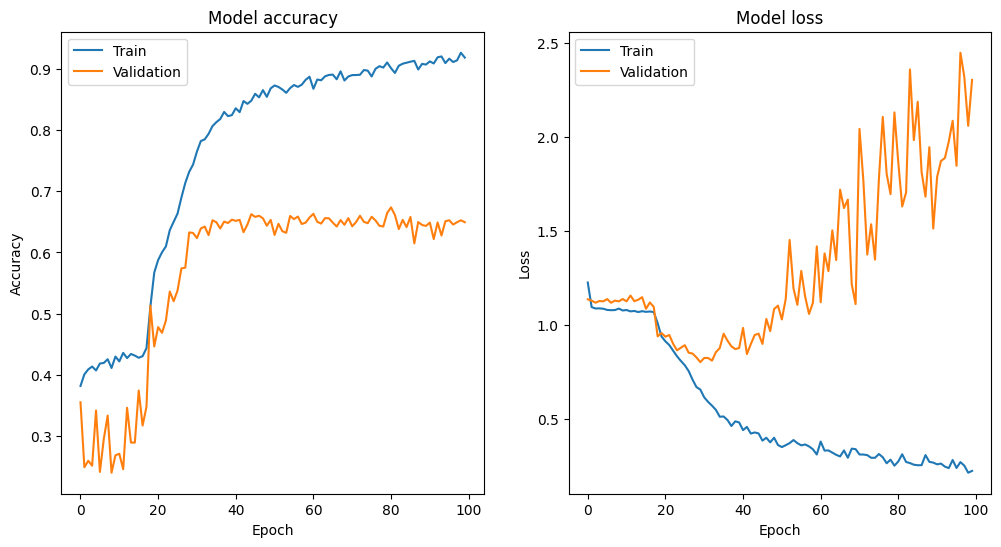

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


98/98 [==============================] - 9s 72ms/step


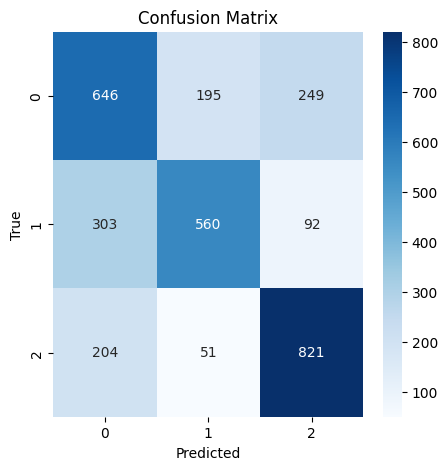

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_val_combined)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_val_encoded  # No need for argmax

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)


# Plot the heatmap
plt.figure(figsize=(5,5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
